In [43]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")

Imported all.


# Open data files

In [44]:
# Open propmt TPC data file
file_dir = "./assets/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_prompt)
# Reorder columns
df_TPC_prompt = df_TPC_prompt[["Symbol","Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

Considered delayed if created at time > 20 microseconds

In [45]:
# Open delayed TPC data file
file_dir = "./assets/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_delayed)
# Reorder columns
df_TPC_delayed = df_TPC_delayed[["Symbol","Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

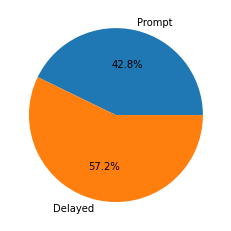

In [46]:
# Ratio of prompt to delayed counts
plt.pie(x=[df_TPC_prompt["Counts"].sum(), df_TPC_delayed["Counts"].sum()], autopct='%1.1f%%', labels=["Prompt", "Delayed"])
plt.show()

In [47]:
# Open buffer data file
file_dir = "./assets/A_Z_count-buffers.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_buffers = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_buffers)
# Reorder columns
df_buffers = df_buffers[["Symbol","Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Add activity (/yr)

In [48]:
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
sim_length = 29.01
df_buffers["Activity (/yr)"] = df_buffers["Counts"] / sim_length
df_TPC_prompt["Activity (/yr)"] = df_TPC_prompt["Counts"] / sim_length
df_TPC_delayed["Activity (/yr)"] = df_TPC_delayed["Counts"] / sim_length

# Filter by unstable

In [51]:
# Ignore stable isotopes
unstable_buffers = df_buffers[df_buffers["Stable"] == False]
unstable_TPC_prompt = df_TPC_prompt[df_TPC_prompt["Stable"] == False]
unstable_TPC_delayed = df_TPC_delayed[df_TPC_delayed["Stable"] == False]

# Filter by realistic half-life

In [52]:
# 5 years * nanoseconds
upper_lim = 5 * year_in_nano
unstable_buffers = unstable_buffers[unstable_buffers["Half Life"] < upper_lim].sort_values("Half Life")
unstable_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life"] < upper_lim].sort_values("Half Life")
unstable_TPC_delayed = unstable_TPC_delayed[unstable_TPC_delayed["Half Life"] < upper_lim].sort_values("Half Life")

# Unstable in buffer
To look for gamma rays

In [53]:
unstable_buffers.sort_values("Max Q-Value", ascending=False)

,Symbol,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life,"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr),Count per Muon
36,B,B 5-14,5,14,3,1.241304e-07,False,1.250000e-02,"[[B-, 1.0, 20.644]]",20.644,red,0.103413,3.177154e-07
24,Li,Li 3-11,3,11,3,1.241304e-07,False,8.750000e-03,"[[B-, 1.0, 20.623], [BN, 0.83, 20.119], [B2N, ...",20.623,red,0.103413,3.177154e-07
140,Al,Al 13-36,13,36,1,4.137680e-08,False,9.000000e-02,"[[B-, 1.0, 18.264], [BN, 0.31, 12.071]]",18.264,red,0.034471,0.000000e+00
15,B,B 5-8,5,8,16,6.620289e-07,False,7.700000e-01,"[[EC, 1.0, 17.98], [EA, 1.0, 0.0]]",17.980,red,0.551534,2.382866e-06
59,N,N 7-20,7,20,3,1.241304e-07,False,1.360000e-01,"[[B-, 1.0, 17.968], [BN, 0.429, 10.359]]",17.968,red,0.103413,3.177154e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,C,C 6-14,6,14,1001,4.141818e-05,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,34.505343,1.588577e-04
32,Be,Be 4-13,4,13,5,2.068840e-07,False,2.700000e-21,"[[N, None, 0.1]]",0.100,red,0.172354,6.354309e-07
14,Be,Be 4-8,4,8,2511,1.038972e-04,False,8.520000e-17,"[[A, 1.0, 0.092]]",0.092,red,86.556360,3.987329e-04
20,Li,Li 3-10,3,10,6,2.482608e-07,False,0.000000e+00,"[[N, 1.0, 0.025]]",0.025,red,0.206825,7.942886e-07


# Look for important unstable isotopes in TPC
For any late decays

In [54]:
print(f"Total Activity (/yr): {unstable_TPC_delayed['Activity (/yr)'].sum()}")
unstable_TPC_delayed[unstable_TPC_delayed["Activity (/yr)"] >= 1].sort_values("Activity (/yr)", ascending=False)

Total Activity (/yr): 69985.4877628404


,Symbol,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life,"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Activity (/yr),Count per Muon
90,Ar,Ar 18-41,18,41,1782634,0.235214,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,61448.948638,0.476448
86,Ar,Ar 18-39,18,39,168570,0.022242,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,5810.754912,0.045054
79,Ar,Ar 18-37,18,37,47849,0.006314,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,1649.396760,0.012788
81,Cl,Cl 17-38,17,38,14504,0.001914,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,499.965529,0.003876
70,S,S 16-35,16,35,5090,0.000672,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,175.456739,0.001360
59,P,P 15-32,15,32,4718,0.000623,False,1.230000e+06,"[[B-, 1.0, 1.71]]",1.710,red,162.633575,0.001261
44,Al,Al 13-28,13,28,1568,0.000207,False,1.340000e+02,"[[B-, 1.0, 4.642]]",4.642,red,54.050327,0.000419
77,S,S 16-37,16,37,1011,0.000133,False,3.030000e+02,"[[B-, 1.0, 4.865]]",4.865,red,34.850052,0.000270
34,Na,Na 11-24,11,24,767,0.000101,False,5.400000e+04,"[[B-, 1.0, 5.515]]",5.515,red,26.439159,0.000205
65,P,P 15-34,15,34,674,0.000089,False,1.240000e+01,"[[B-, 1.0, 5.374]]",5.374,red,23.233368,0.000180
